# Librería Matplotlib

Matplotlib es una de las librerías mas populares para la visualización de datos en Python. Permite realizar gráficos 2D a partir de datos de arreglos.
-  matplotlib.pyplot- colección de funciones que permiten hacer cambios a las figura.


##  Gráficas básicas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline #comando en Jupyter para ver gráficas directo en notebook

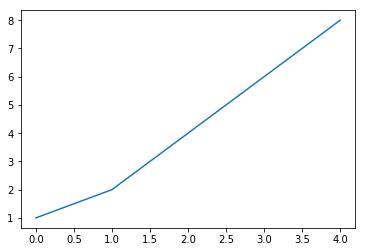

In [4]:
#Asume los valores del eje x 0...n 
plt.plot([1,2,4,6,8])

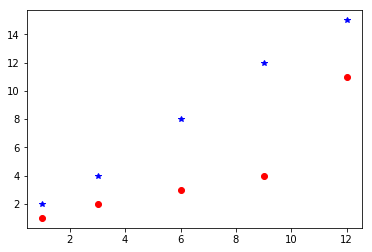

In [11]:
#grafica puntos
plt.plot([1,3,6,9,12],[1,2,3,4,11],'ro', label= 'puntos rojos' )
plt.plot([1,3,6,9,12],[2,4,8,12,15],'b*', label= 'estrellas azules' )


Text(0.5, 1.0, 'Gráfica del coseno')

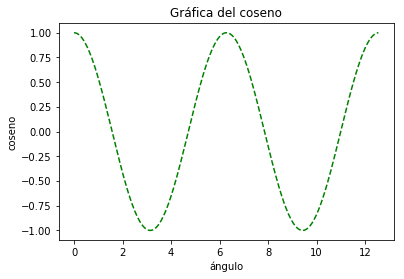

In [9]:
x=np.arange(0,math.pi*4,0.05)
y=np.cos(x)
plt.plot(x,y, 'g--')
plt.xlabel('ángulo')
plt.ylabel('coseno')
plt.title('Gráfica del coseno')
#plt.show()

## Formatear el estilo del gráfico

-  Estilo de línea (- linea sólida; -- discontinuas; : punteadas; -. punteadas con guiones)
-  Marcador ( + cruz; o círculo; * estrella .. s d v etc)
-  Color ( k negro; r rojo; g verde; b azul; y amarillo; m magenta; c cyan; w blanco)

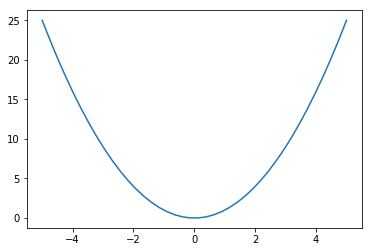

In [15]:
x = np.linspace(-5, 5, 40)
y = x**2
plt.plot(x, y)
#ponerle título, cambiar el estilo

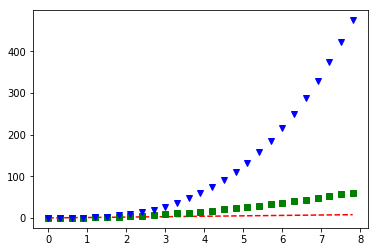

In [24]:
#Probar diferentes tipos
x=np.arange(0.,8.,0.3)
plt.plot(x,x,'r--', x,x**2,'gs', x,x**3,'bv')

## Gráficas de distribución

In [30]:
import pandas as pd

In [26]:
from sklearn.datasets import california_housing

data = california_housing.fetch_california_housing()

In [27]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [28]:
X = data['data']
y = data['target']
columns = data['feature_names']

In [31]:
train_df = pd.DataFrame(X, index=np.arange(len(X)), columns=columns)
train_df['target'] = y
train_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


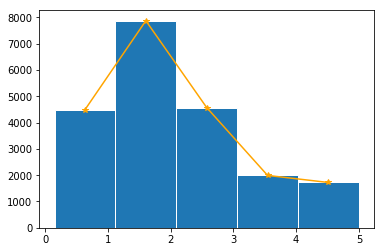

In [32]:
N, X, _ = plt.hist(train_df['target'], bins=5, ec='w') # 'ec' (edgecolors) for outline
X = 0.5*(X[1:]+ X[:-1])
_ = plt.plot(X, N, '-*', color='orange')

In [33]:
print(N)

[4489. 7870. 4568. 1991. 1722.]


In [34]:
print(X)

[0.634992 1.604996 2.575    3.545004 4.515008]


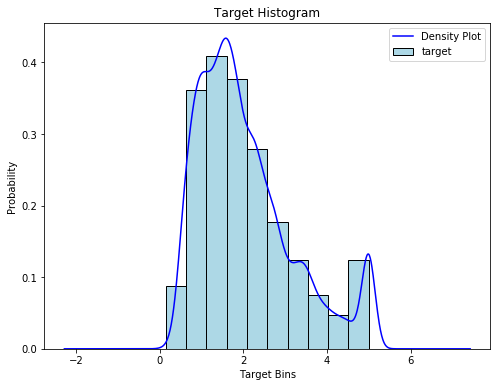

In [35]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6))

train_df['target'].plot.kde(label="Density Plot", color='b') # Or you can use gaussian_kde from scipy.stats as given here: https://realpython.com/python-histograms/
_ = plt.hist(train_df['target'], bins=10, color='lightblue', label='target', density=True, ec='black')
plt.legend()
plt.title("Target Histogram")
plt.xlabel("Target Bins")
plt.ylabel("Probability");

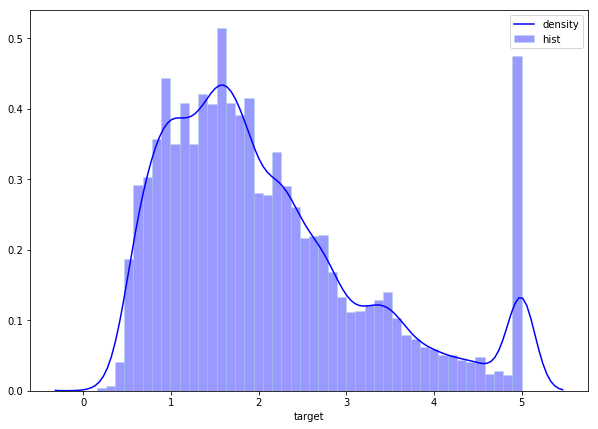

In [36]:
import seaborn as sns
figure(figsize=(10, 7))

_ = sns.distplot(train_df['target'], hist_kws={'ec':'lightblue', 'color':'blue', 'label':'hist'}, 
                 kde_kws={'color':'b', 'label':'density'})
plt.legend();

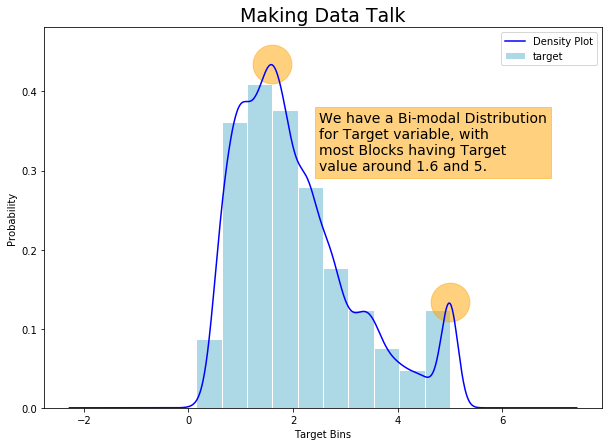

In [37]:
figure(figsize=(10, 7))

temp = train_df['target'].plot.kde(label="Density Plot", color='b') # Or you can use gaussian_kde from scipy.stats as given here: https://realpython.com/python-histograms/
_ = plt.hist(train_df['target'], bins=10, color='lightblue', label='target', density=True, ec='white')
plt.legend()
plt.title("Making Data Talk", fontdict={'fontsize': 19, 'fontweight':0.5 })
plt.xlabel("Target Bins")
plt.ylabel("Probability")
plt.text(2.5, 0.3, "We have a Bi-modal Distribution\nfor Target variable, with\nmost Blocks having Target\nvalue around 1.6 and 5.", fontsize=14,
            bbox={'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.5, 'pad': 4})
plt.scatter([1.6, 5], [0.435, 0.134], s=1500, c='orange', alpha=0.5)

for p in _[2]:
    p.set_zorder(0)

In [41]:
!pip install SWMat

  Stored in directory: C:\Users\lmartine\AppData\Local\pip\Cache\wheels\01\0b\d6\78e2247a295db915cc09ff20394f5e1e67942d311d09d59f70
Successfully built SWMat


In [42]:
import sys
sys.path.append('../SWMat/')
from SWMat.SWMat import SWMat

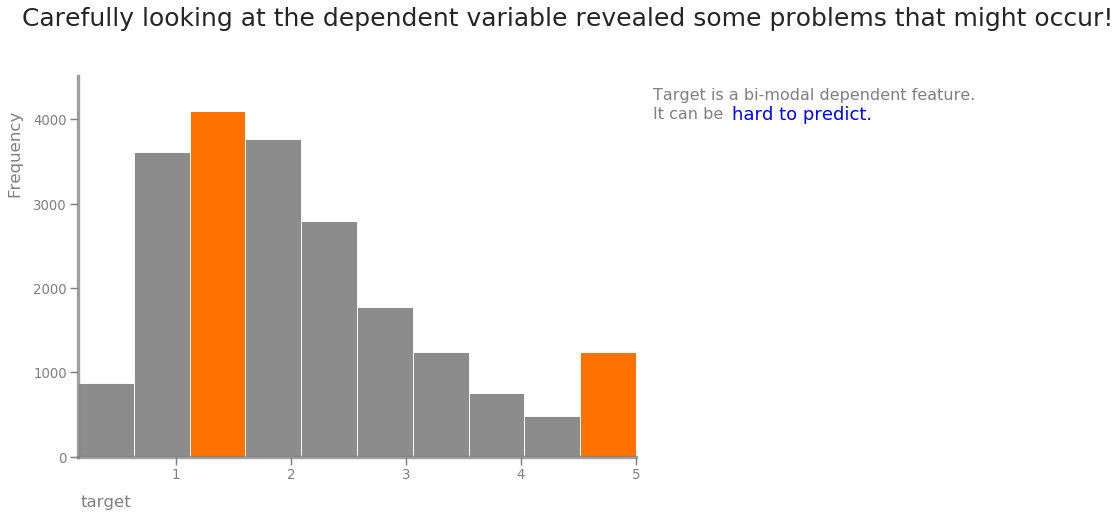

In [43]:
swm = SWMat(plt)
swm.hist(train_df['target'], bins=10, highlight=[2, 9])
swm.title("Carefully looking at the dependent variable revealed some problems that might occur!")
swm.text("Target is a bi-modal dependent feature.\nIt can be <prop fontsize='18' color='blue'> hard to predict.<\prop>",btw_text_dist=.5);

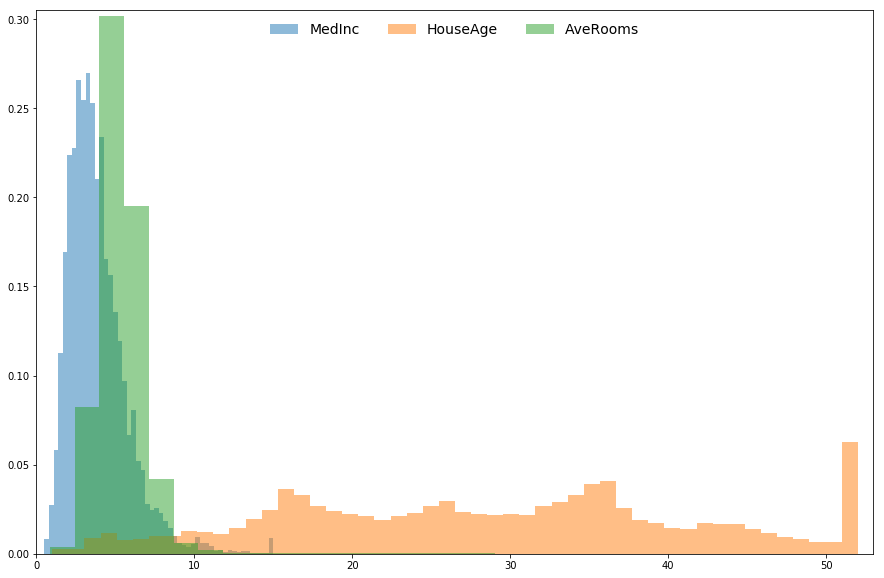

In [38]:
figure(figsize=(15, 10))

plt.hist(train_df['MedInc'], bins=50, density=True, alpha=0.5, label="MedInc")
plt.hist(train_df['HouseAge'], bins=50, density=True, alpha=0.5, label="HouseAge")
plt.hist(train_df['AveRooms'], bins=90, density=True, alpha=0.5, label="AveRooms")
plt.axis([0, 53, 0, 0.305])
plt.legend(frameon=False, loc='upper center', ncol=3, fontsize=14);

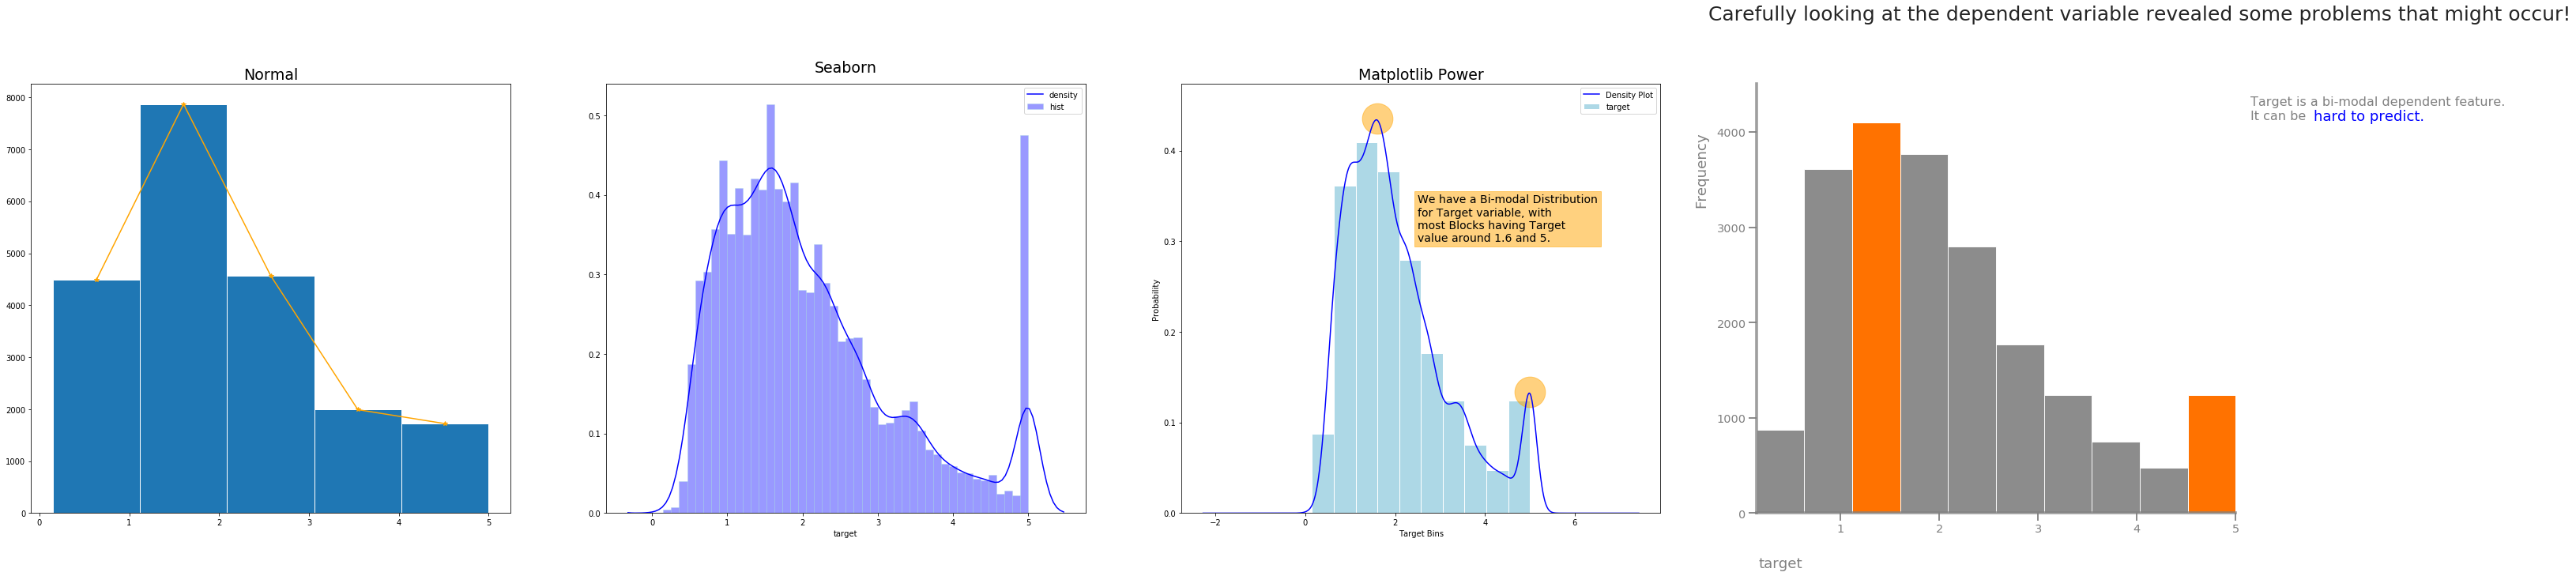

In [44]:
fig, axs = plt.subplots(1, 4, figsize=(50, 10))

N, X, _ = axs[0].hist(train_df['target'], bins=5, ec='w')
X = 0.5*(X[1:]+ X[:-1])
axs[0].plot(X, N, '-*', color='orange')
axs[0].set_title("Normal", fontdict={'fontsize': 19})

sns.distplot(train_df['target'], hist_kws={'ec':'lightblue', 'color':'blue', 'label':'hist'}, 
                 kde_kws={'color':'b', 'label':'density'}, ax=axs[1])
axs[1].legend()
axs[1].set_title("Seaborn", fontdict={'fontsize': 19}, pad=15)

train_df['target'].plot.kde(label="Density Plot", color='b', ax=axs[2]) # Or you can use gaussian_kde from scipy.stats as given here: https://realpython.com/python-histograms/
ht = axs[2].hist(train_df['target'], bins=10, color='lightblue', label='target', density=True, ec='white')
axs[2].legend()
axs[2].set_title("Matplotlib Power", fontdict={'fontsize': 19})
axs[2].set_xlabel("Target Bins")
axs[2].set_ylabel("Probability")
axs[2].text(2.5, 0.3, "We have a Bi-modal Distribution\nfor Target variable, with\nmost Blocks having Target\nvalue around 1.6 and 5.", fontsize=14,
            bbox={'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.5, 'pad': 4})
axs[2].scatter([1.6, 5], [0.435, 0.134], s=1500, c='orange', alpha=0.5)
for p in ht[2]:
    p.set_zorder(0)
    
swm = SWMat(plt, ax=axs[3])
swm.hist(train_df['target'], bins=10, highlight=[2, 9])
swm.title("Carefully looking at the dependent variable revealed some problems that might occur!")
swm.text("Target is a bi-modal dependent feature.\nIt can be <prop fontsize='18' color='blue'> hard to predict.<\prop>",btw_text_dist=.5, btw_line_dist=.7);

## Gráficas relacionales

Son útiles para mostrar la relación entre dos variables

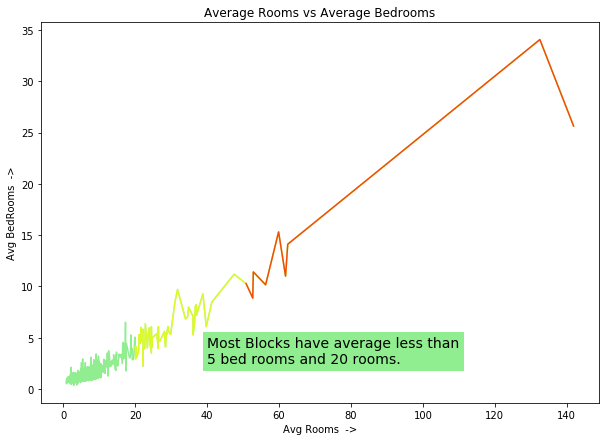

In [48]:
#Grafica de Linea 
figure(figsize=(10, 7))

sorted_df = train_df.sort_values('AveRooms')

plt.plot('AveRooms', 'AveBedrms', data=sorted_df, c='lightgreen')
plt.plot('AveRooms', 'AveBedrms', data=sorted_df[(sorted_df['AveRooms']>20)], c='yellow', alpha=0.7)
plt.plot('AveRooms', 'AveBedrms', data=sorted_df[(sorted_df['AveRooms']>50)], c='red', alpha=0.7)

# Adding text:
plt.text(40, 2.5, "Most Blocks have average less than\n5 bed rooms and 20 rooms.", fontsize=14,
        bbox={'facecolor': 'lightgreen', 'edgecolor': 'lightgreen', 'pad': 4})

plt.title("Average Rooms vs Average Bedrooms")
plt.xlabel("Avg Rooms  ->")
plt.ylabel("Avg BedRooms  ->");

### Gráfico de dispersión

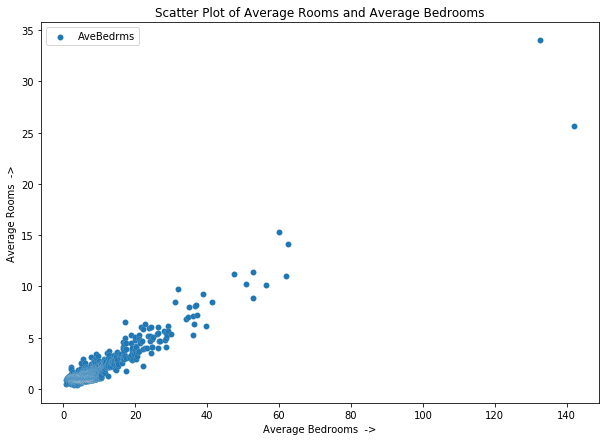

In [49]:

figure(figsize=(10, 7))

plt.scatter('AveRooms', 'AveBedrms', data=train_df.sort_values('AveRooms'), edgecolors='w', linewidths=0.1)

plt.legend()
plt.title("Scatter Plot of Average Rooms and Average Bedrooms")
plt.xlabel("Average Bedrooms  ->")
plt.ylabel("Average Rooms  ->");

In [51]:
# For fitting a linear line:
from numpy.polynomial.polynomial import polyfit

const, slope = polyfit(train_df['AveRooms'], train_df['AveBedrms'], deg=1)
Y = train_df['AveRooms']*slope + const

Text(120, 3, 'Regression Line')

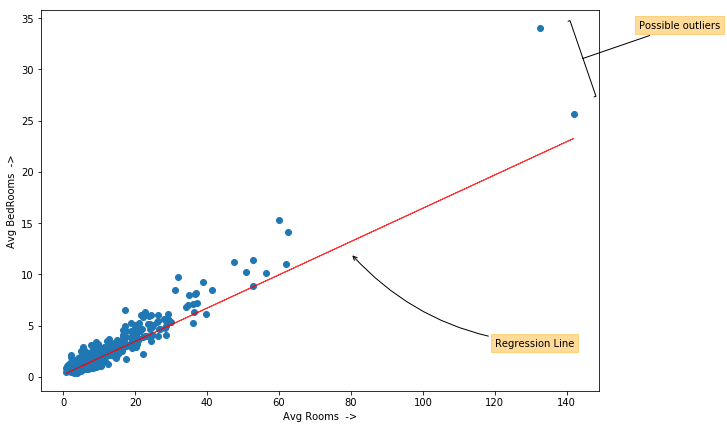

In [54]:
figure(figsize=(10, 7))

plt.scatter('AveRooms', 'AveBedrms', data=train_df.sort_values('AveRooms'))#, edgecolors='w')
plt.plot(train_df['AveRooms'], Y, linewidth=1, color='red', linestyle='-', alpha=0.8)

plt.xlabel("Avg Rooms  ->")
plt.ylabel("Avg BedRooms  ->")

# Adding annotations:
plt.annotate("Possible outliers", xy=(144, 31), xytext=(160, 34),
             arrowprops={'arrowstyle':'-[,widthB=4.0', 'color': 'black'},
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor':'orange', 'alpha':0.4})

plt.annotate("Regression Line", xy=(80, 12), xytext=(120, 3),
             arrowprops={'arrowstyle':'->', 'color': 'black', "connectionstyle":"arc3,rad=-0.2"},
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor':'orange', 'alpha':0.4})


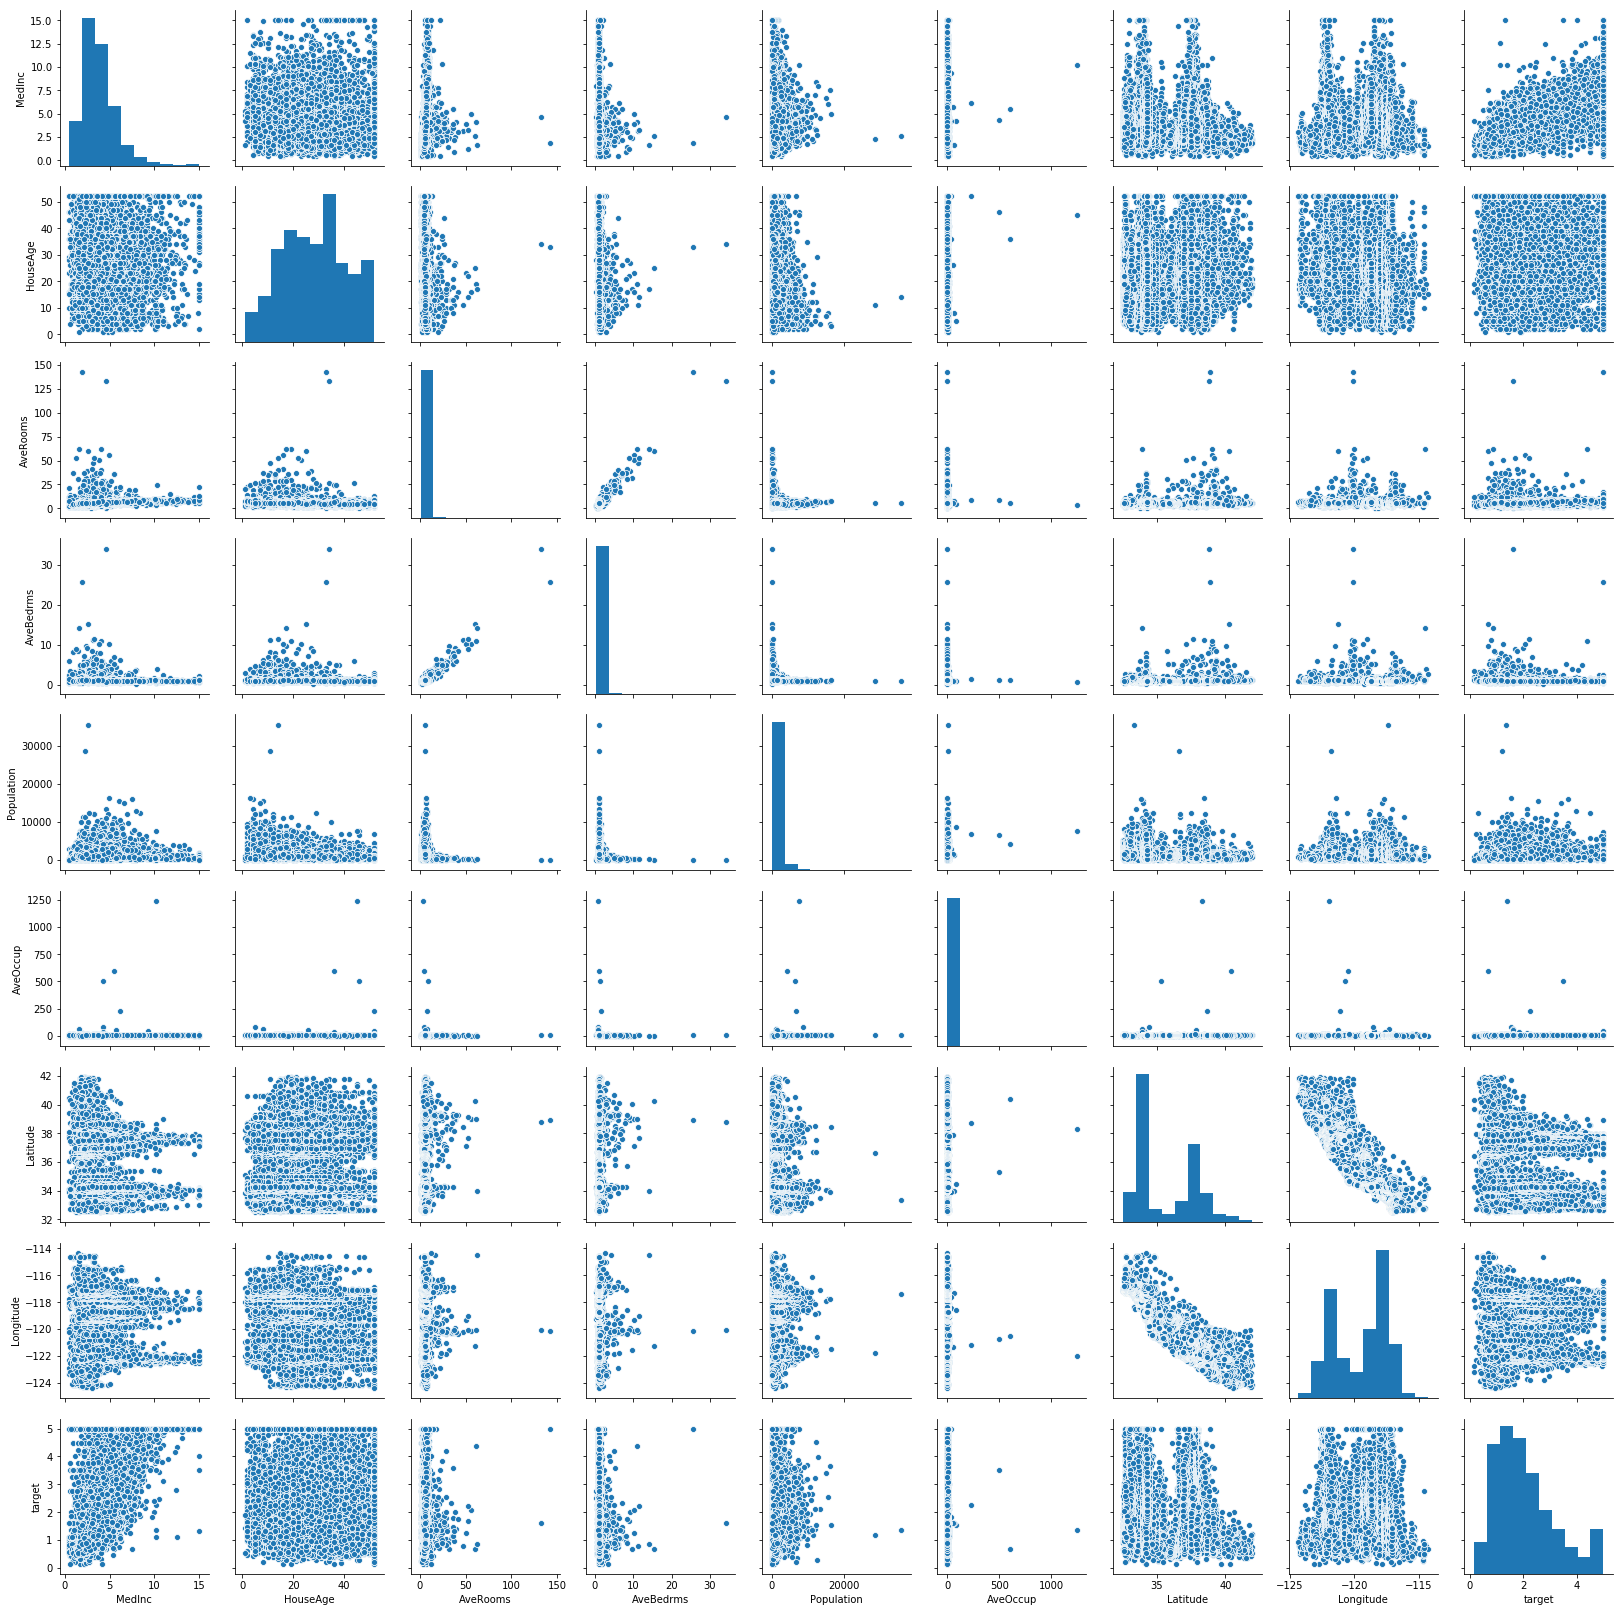

In [55]:
#Relaciones de todas las relaciones con seaborn
_=sns.pairplot(train_df)

## Gráficas de variables categóricas

In [58]:
#Primero hacer algunas variables categóricas, en el dataset housing no hay
train_df['target_int'] = train_df['target']
train_df.loc[(train_df['target'] < 1), 'target_int'] = 0
train_df.loc[(train_df['target'] >= 1) & (train_df['target'] < 2), 'target_int'] = 1
train_df.loc[(train_df['target'] >= 2) & (train_df['target'] < 3), 'target_int'] = 2
train_df.loc[(train_df['target'] >=3) & (train_df['target'] < 4), 'target_int'] = 3
train_df.loc[(train_df['target'] >= 4), 'target_int'] = 4

In [59]:
# From 0th percentile to 25th percentile of Median Income's Distribution
train_df.loc[(train_df['MedInc'] < 2.56), 'medInc_int'] = train_df.loc[(train_df['MedInc'] < 2.56), 'MedInc'].mean()
# From 25th percentile to 50th percentile of Median Income's Distribution
train_df.loc[(train_df['MedInc'] >= 2.56) & (train_df['MedInc'] < 3.53), 'medInc_int'] = train_df.loc[(train_df['MedInc'] >= 2.56) & (train_df['MedInc'] < 3.53), 'MedInc'].mean()
# From 50th percentile to 75th percentile of Median Income's Distribution
train_df.loc[(train_df['MedInc'] >= 3.53) & (train_df['MedInc'] < 4.74), 'medInc_int'] = train_df.loc[(train_df['MedInc'] >= 3.53) & (train_df['MedInc'] < 4.74), 'MedInc'].mean()
# From 75th percentile to 80th percentile of Median Income's Distribution
train_df.loc[(train_df['MedInc'] >= 4.74) & (train_df['MedInc'] < 7), 'medInc_int'] = train_df.loc[(train_df['MedInc'] >= 4.74) & (train_df['MedInc'] < 7), 'MedInc'].mean()
# From 80th percentile to 100th percentile of Median Income's Distribution
train_df.loc[(train_df['MedInc'] >= 7), 'medInc_int'] = train_df.loc[(train_df['MedInc'] >= 7), 'MedInc'].mean()

### Gráfica de barras

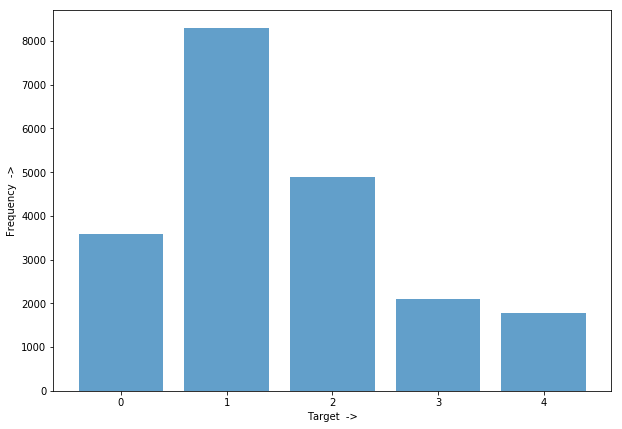

In [60]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.bar(np.sort(train_df['target_int'].unique()), train_df['target_int'].value_counts().sort_index(), alpha=0.7)

plt.xlabel("Target  ->")
plt.ylabel("Frequency  ->");

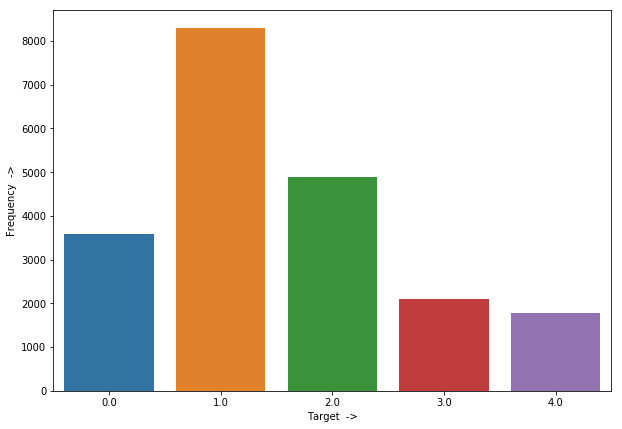

In [62]:
# Mismo ejemplo con Seaborn
figure(figsize=(10, 7))

sns.barplot(np.sort(train_df['target_int'].unique()), train_df['target_int'].value_counts().sort_index())

plt.xlabel("Target  ->")
plt.ylabel("Frequency  ->");

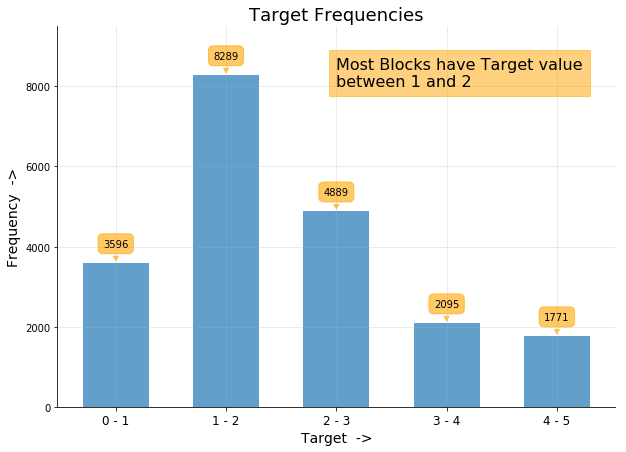

In [61]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.bar(np.sort(train_df['target_int'].unique()), train_df['target_int'].value_counts().sort_index(), alpha=0.7, width=0.6)

plt.grid(True, alpha=0.3)
plt.xlabel("Target  ->", fontsize=14)
plt.ylabel("Frequency  ->", fontsize=14)
plt.title("Target Frequencies", fontsize=18)

# Remove top and left spines:
ax = plt.gca() # Get current axis (gca)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adding annotations:
counts = train_df['target_int'].value_counts().sort_index()
plt.annotate(str(counts[0]), xy=(0, counts[0]), xytext=(0, counts[0]+400), ha = 'center', # horizontalalignment = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
plt.annotate(str(counts[1]), xy=(1, counts[1]), xytext=(1, counts[1]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
plt.annotate(str(counts[2]), xy=(2, counts[2]), xytext=(2, counts[2]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
plt.annotate(str(counts[3]), xy=(3, counts[3]), xytext=(3, counts[3]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
plt.annotate(str(counts[4]), xy=(4, counts[4]), xytext=(4, counts[4]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["0 - 1", "1 - 2", "2 - 3", "3 - 4", "4 - 5"], fontsize=12)
plt.ylim([0, 9500])
plt.text(2, 8000, "Most Blocks have Target value\nbetween 1 and 2", fontsize=16,
           bbox={'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.5, 'pad': 7});

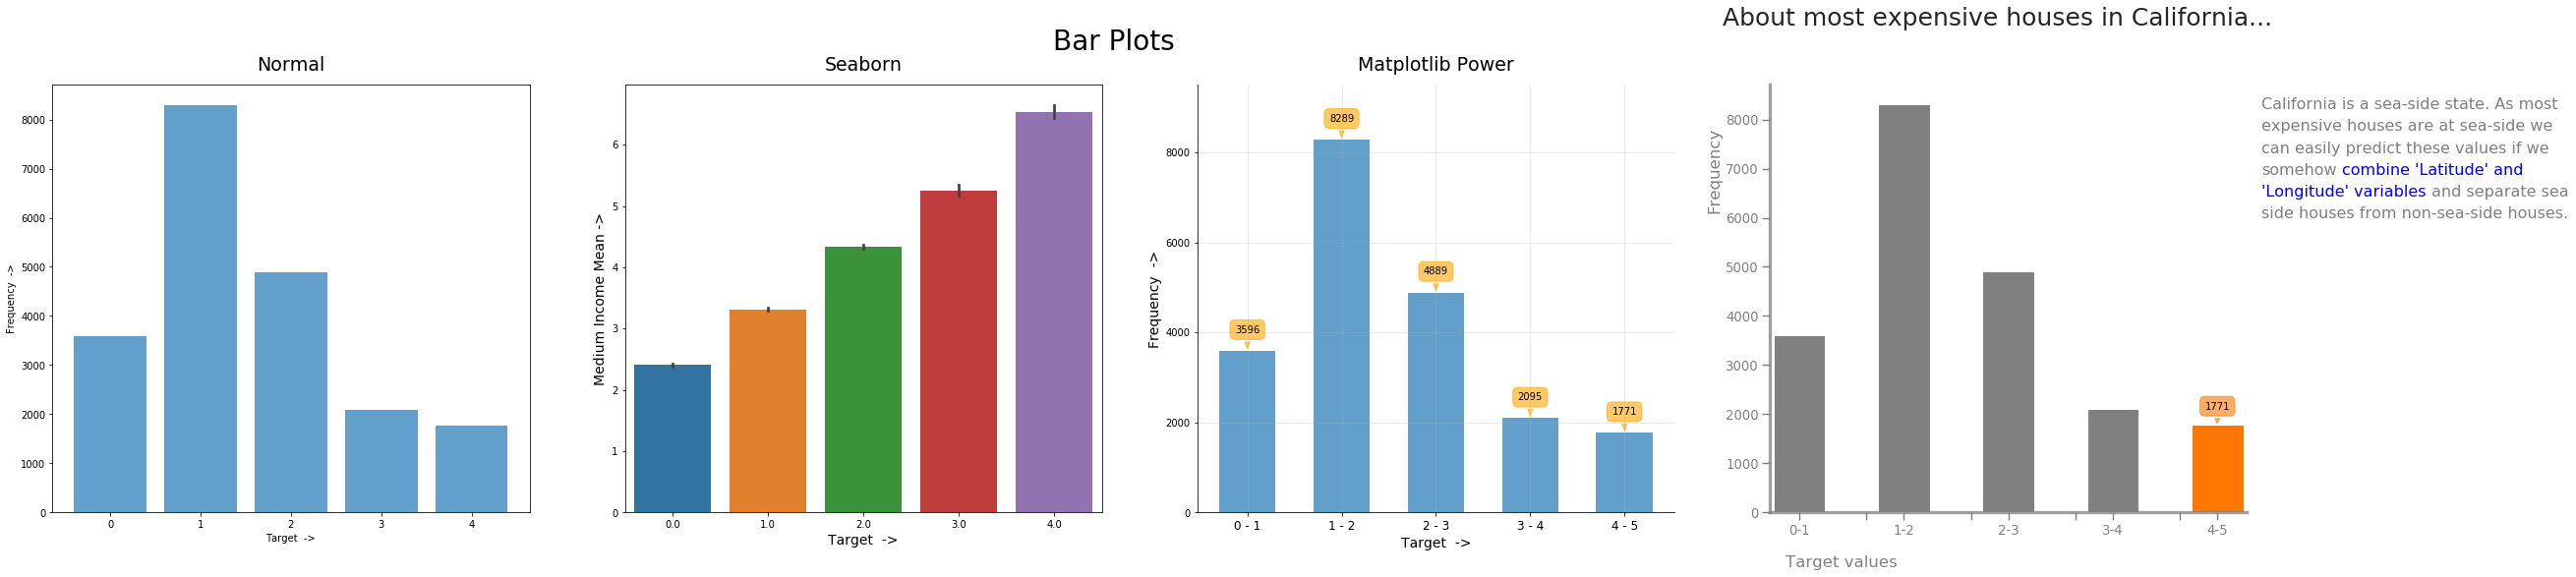

In [63]:
fig, axs = plt.subplots(1, 4, figsize=(40, 8))
fig.suptitle("Bar Plots", fontsize=28)

axs[0].bar(np.sort(train_df['target_int'].unique()), train_df['target_int'].value_counts().sort_index(), alpha=0.7)
axs[0].set_title("Normal", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[0].set_xlabel("Target  ->")
axs[0].set_ylabel("Frequency  ->")

sns.barplot("target_int", "medInc_int", data=train_df, ax=axs[1])
axs[1].set_title("Seaborn", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[1].set_xlabel("Target  ->", fontsize=14)
axs[1].set_ylabel("Medium Income Mean ->", fontsize=14)

axs[2].bar(np.sort(train_df['target_int'].unique()), train_df['target_int'].value_counts().sort_index(), alpha=0.7, width=0.6)
axs[2].grid(True, alpha=0.3)
axs[2].set_xlabel("Target  ->", fontsize=14)
axs[2].set_ylabel("Frequency  ->", fontsize=14)
axs[2].set_title("Matplotlib Power", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
# Remove top and left spines:
axs[2].spines['right'].set_visible(False)
axs[2].spines['top'].set_visible(False)
# Adding annotations:
counts = train_df['target_int'].value_counts().sort_index()
axs[2].annotate(str(counts[0]), xy=(0, counts[0]), xytext=(0, counts[0]+400), ha = 'center', # horizontalalignment = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
axs[2].annotate(str(counts[1]), xy=(1, counts[1]), xytext=(1, counts[1]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
axs[2].annotate(str(counts[2]), xy=(2, counts[2]), xytext=(2, counts[2]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
axs[2].annotate(str(counts[3]), xy=(3, counts[3]), xytext=(3, counts[3]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
axs[2].annotate(str(counts[4]), xy=(4, counts[4]), xytext=(4, counts[4]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
axs[2].set_xticks([0, 1, 2, 3, 4])
axs[2].set_xticklabels(["0 - 1", "1 - 2", "2 - 3", "3 - 4", "4 - 5"], fontsize=12)
axs[2].set_ylim([0, 9500])

x, y = np.sort(train_df['target_int'].unique()), train_df['target_int'].value_counts().sort_index()
swm = SWMat(plt, ax=axs[3])
swm.bar(x, y, highlight={"cat": [-1]}, highlight_type={"data_type": "incrementalDown"},
        cat_labels=["0-1", "1-2", "2-3", "3-4", "4-5"], highlight_color={"cat_color": "#FF7700"}, annotate=True)
swm.axis(labels=["Target values", "Frequency"])
swm.title("About most expensive houses in California...")
swm.text("California is a sea-side state. As most\nexpensive houses are at sea-side we\ncan easily predict these values if we\nsomehow <prop color='blue'>combine 'Latitude' and\n'Longitude' variables </prop>and separate sea\nside houses from non-sea-side houses.",
        btw_text_dist=.1);

### Gráfica de Cajas y bigotes

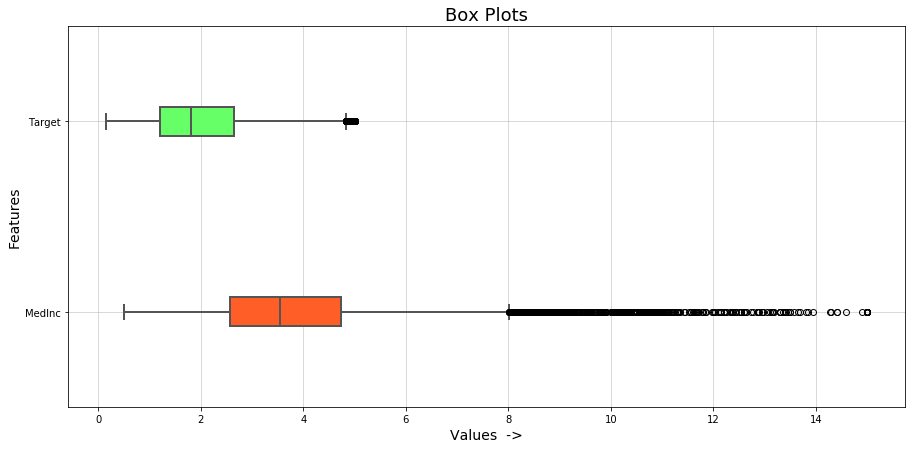

In [64]:
from matplotlib.pyplot import figure
figure(figsize=(15, 7))

bp = plt.boxplot([train_df['MedInc'], train_df['target']], vert=False, patch_artist=True) # patch_artist for coloring box plot

plt.grid(True, alpha=0.6)
plt.title("Box Plots", fontsize=18)
plt.xlabel("Values  ->", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.yticks(ticks=[1, 2], labels=['MedInc', 'Target'])

# Coloring Box Plots and ...  (https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color)
for el in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    for i in range(len(bp[el])):
        plt.setp(bp[el][i], color='#555555')
        plt.setp(bp[el][i], linewidth=2)

bp['boxes'][0].set(facecolor='#FF5F27')
bp['boxes'][1].set(facecolor="#67FF67");

### Gráfica de violín

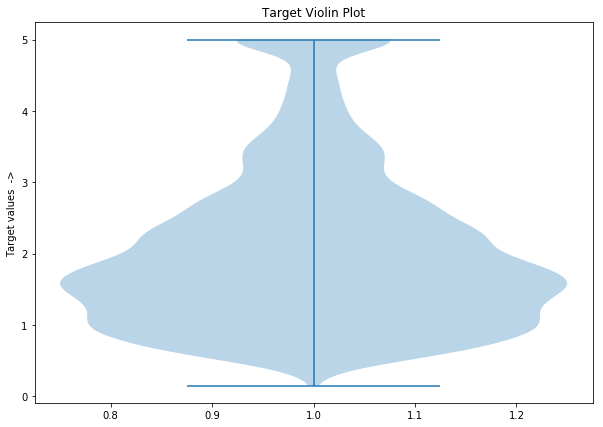

In [65]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.violinplot(train_df['target'])

plt.title("Target Violin Plot")
plt.ylabel("Target values  ->");

**Referencias:**
    1. Puneet  Grover, Make your Data Talk, Disponible en: https://towardsdatascience.com/make-your-data-talk-13072f84eeac, Mediium, Fecha de acceso: 5/Mayo/2020, Fecha de publicación: 10/Mayo/2019<
    2. John Hunter, Darren Dale, Eric Firing, Michael Droettboom and the Matplotlib development team; 2012 - 2018 The Matplotlib development team, Pyplot Tutorial, Disponible en : https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html, Última actualización en May 18, 2019. Created using Sphinx 1.8.5. Doc version v3.1.0-4-g0078324e4,Fecha de acceso: 5/Mayo/2020

Notebook original: https://nbviewer.jupyter.org/github/PuneetGrov3r/MediumPosts/blob/master/Tackle/HowToVisualize.ipynb